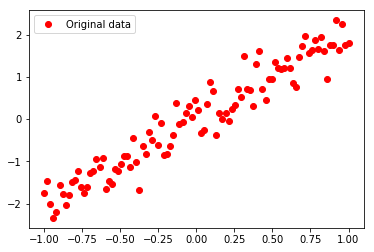

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()


tf.reset_default_graph()

# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# 前向结构
z = tf.multiply(X, W)+ b
tf.summary.histogram('z',z)#将预测值以直方图显示
#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
tf.summary.scalar('loss_function', cost)#将损失以标量显示
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
#参数设置
training_epochs = 20
display_step = 2

Epoch: 1 cost= 0.382655 W= [ 1.24071717] b= [ 0.24168634]
Epoch: 3 cost= 0.137836 W= [ 1.8153156] b= [ 0.08922761]
Epoch: 5 cost= 0.117193 W= [ 1.97129107] b= [ 0.03051785]
Epoch: 7 cost= 0.115665 W= [ 2.01174688] b= [ 0.01501238]
Epoch: 9 cost= 0.115529 W= [ 2.02220893] b= [ 0.01099795]
Epoch: 11 cost= 0.115511 W= [ 2.02491403] b= [ 0.00995988]
Epoch: 13 cost= 0.115508 W= [ 2.02561331] b= [ 0.00969168]
Epoch: 15 cost= 0.115507 W= [ 2.02579403] b= [ 0.00962223]
Epoch: 17 cost= 0.115507 W= [ 2.025841] b= [ 0.00960421]
Epoch: 19 cost= 0.115507 W= [ 2.0258522] b= [ 0.00959986]
 Finished!
cost= 0.115507 W= [ 2.02585435] b= [ 0.00959906]


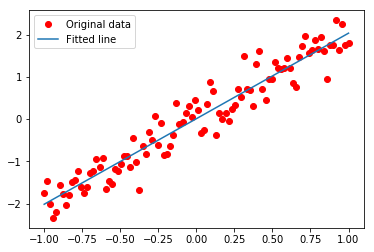

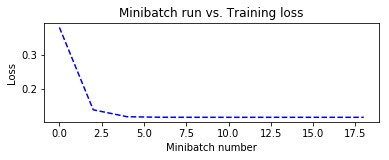

x=0.2，z= [ 0.41476995]


In [2]:
# 启动session
with tf.Session() as sess:
    sess.run(init)
    
    merged_summary_op = tf.summary.merge_all()#合并所有summary
    #创建summary_writer，用于写文件
    summary_writer = tf.summary.FileWriter('log/mnist_with_summaries',sess.graph)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
            #生成summary
            summary_str = sess.run(merged_summary_op,feed_dict={X: x, Y: y});
            summary_writer.add_summary(summary_str, epoch);#将summary 写入文件

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()

    print ("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))

In [3]:
x=[3,4,0,2,1]

In [5]:
test=tf.invert_permutation(x)

In [8]:
with tf.Session() as sess:
    
    print (sess.run(test))

[2 4 3 0 1]


In [9]:
var1 = tf.Variable(1.0,name='firstvar')
print('var1:',var1.name)

var1: firstvar:0


In [10]:
var1 = tf.Variable(2.0,name='firstvar')

In [11]:
print('var1:',var1.name)

var1: firstvar_1:0
